<a href="https://colab.research.google.com/github/kaojodesu/awa/blob/main/pc_your_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Get data from a .csv file online

In [ ]:
import pandas as pd
from google.colab import files
import io

# random file, but use this url:
#url = "https://people.sc.fsu.edu/~jburkardt/data/csv/cities.csv"
#url = "https://people.sc.fsu.edu/~jburkardt/data/csv/nile.csv"
url = "https://people.sc.fsu.edu/~jburkardt/data/csv/letter_frequency.csv"
# url = input("URL of the csv: ")

table_1 = pd.read_csv(url)

#years = table_1["Year"].to_numpy()
table_1.head()
table_1.describe()


# Data from an uploaded .csv file

In [ ]:
import pandas as pd
from google.colab import files
import io

# dialog to upload from computer:
uploaded = files.upload()
file_name = next(iter(uploaded))
table_1 = pd.read_csv(io.BytesIO(uploaded[file_name]))
table_1


# Data from a table on a web page

In [ ]:
import pandas as pd
import numpy as np

URL = "https://en.wikipedia.org/wiki/Philadelphia_Phillies"
# URL = "https://en.wikipedia.org/wiki/Cricket_World_Cup"
tables = pd.read_html(URL)
print("There are : ",len(tables)," tables")
print("Take look at the table:")
table_1 = tables[4]
table_1



Continue the above code

In [ ]:
# WPct
wins = np.array(table_1["Wins"])
losses = np.array(table_1["Losses"])
avg = wins/(wins+losses)
#print(avg)
table_1["Average"] = avg
print(table_1[["Manager","WPct","Average"]])


Another example with tides

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import calendar

URL = "https://marineweather.net/tide/cape-may-canal-cape-may-delaware-bay-nj-tides"
tables = pd.read_html(URL)
print("There are : ",len(tables)," tables")
print("Take look at the table:")
#print(tables[0])
table_1 = tables[0]
table_1.head()


Continuing the tide example

In [ ]:
# trying different things

# Converting strings to epoch time
time_list = table_1["Time"]
date_list = table_1["Date"]
h_array = []
m_array = []
d_array = []
epoch_array = []

for t in time_list:
    a = t.split(":")
    hour = int(a[0])
    b = a[1]
    min = int(b[0:2])
    if b[-2:] == "pm": hour = hour+11
    h_array.append(hour)
    m_array.append(min)
    #print(hour,":",min)

for d in date_list:
    # print(d[8::])
    d_array.append(int(d[8::]))

for c in range(len(time_list)):
    t = datetime(2023, 8, d_array[c], h_array[c], m_array[c], 0)
    epoch_array.append(int(calendar.timegm(t.timetuple())))

print(epoch_array)

# converting tide heights to float numbers
height_list = table_1["Feet"]
f_array = []
for f in height_list:
    f_array.append(float(f[0:4]))

print(f_array)


# Data from a Google Spreadsheet
You have to authenticate the connection at the beginning of each session, but not every time you call that spreadsheet

In [ ]:
# actual google code snippet

from google.colab import auth
auth.authenticate_user()
import pandas as pd
import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

worksheet = gc.open('comparing file types').sheet1

# only need to do this once per session


Continuing the above code

In [ ]:

# get_all_values gives a list of rows.
rows = worksheet.get_all_values()
print(len(rows))
x = len(rows)

int_array = []
for num in range(1,len(rows)):
    int_array.append(int(rows[num][2]))

print(int_array)



# Read data from other file types

In [ ]:
import pandas as pd

# not a real site
URL = "https://website.com/filename.xlsx"
sheet = pd.read_excel(URL)
sheet.head()


# Draw Lines

Simple example

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches

verts = []
steps = []

# add starting point
verts.append((0.,0.))
steps.append(Path.MOVETO)

# add lines one at a time
verts.append((2.,2.))
steps.append(Path.LINETO)

# more
verts.append((2.,-2.))
steps.append(Path.LINETO)

verts.append((0.,0.))
steps.append(Path.CLOSEPOLY)

# graph
fig, ax = plt.subplots()
plt.axis([-5,5,-5,5])
path = Path(verts, steps)
patch = patches.PathPatch(path)
ax.add_patch(patch)
plt.show()

More elaborate arrays

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches

# array of points
verts = [(0., 0.), (-1., 1.), (0., 2.), (2., 2.), (3., 1.), (2., 0.), (0., 0.),]

# array of steps
codes = [Path.MOVETO,
         Path.LINETO,
         Path.LINETO,
         Path.LINETO,
         Path.LINETO,
         Path.LINETO,
         Path.CLOSEPOLY, ]

# graph
fig, ax = plt.subplots()
plt.axis([-5,5,-5,5])
path = Path(verts, codes)
patch = patches.PathPatch(path, facecolor='blue', lw=2)
ax.add_patch(patch)
plt.show()



#The triangle

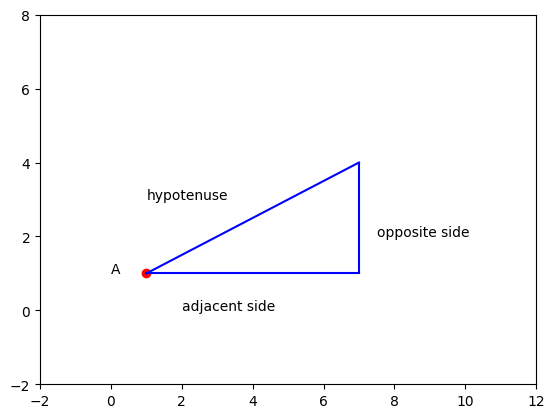

In [ ]:
import matplotlib.pyplot as plt
from IPython import display
import math
import time

# This will display a right triangle
fig, ax = plt.subplots()
plt.axis([-2,12,-2,8])
ax.text(0,1,'A')
plt.plot([1],[1],'ro')
plt.plot([1,7], [1,1], 'b')
plt.plot([7,7], [1,4], 'b')
plt.plot([1,7], [1,4], 'b')
display.display(plt.gcf())
# time.sleep(1)
display.clear_output(wait=True)

ax.text(2,0,'adjacent side')
display.display(plt.gcf())
# time.sleep(1.5)
display.clear_output(wait=True)

ax.text(7.5,2,'opposite side')
display.display(plt.gcf())
# time.sleep(1.5)
display.clear_output(wait=True)

ax.text(1,3,'hypotenuse')
display.display(plt.gcf())
time.sleep(1.5)
display.clear_output(wait=True)



#Python trig functions
These functions use radians, so you have to use the `math.radians()` function inside the sine, cosine, or tangent functions.

In [ ]:
import math

# angle measure in degrees
a = 30

s = math.sin(math.radians(a))
c = math.cos(math.radians(a))
t = math.tan(math.radians(a))

# rounding to four decimal places is enouogh
print("The sine of ",a," is ", round(s,4))
print("The cosine of ",a," is ", round(c,4))
print("The tangent of ",a," is ", round(t,4))


The sine of  30  is  0.5
The cosine of  30  is  0.866
The tangent of  30  is  0.5774


#Complementary angles

In [ ]:
from io import TextIOBase
import math

# angle measure in degrees
a = 30
b = 90-a

sa = math.sin(math.radians(a))
ca = math.cos(math.radians(a))
ta = math.tan(math.radians(a))

# rounding to four decimal places is enouogh
print("The sine of ",a," is ", round(sa,4))
print("The cosine of ",a," is ", round(ca,4))
print("The tangent of ",a," is ", round(ta,4))

sb = math.sin(math.radians(b))
cb = math.cos(math.radians(b))
tb = math.tan(math.radians(b))

# rounding to four decimal places is enouogh
print("The sine of ",b," is ", round(sb,4))
print("The cosine of ",b," is ", round(cb,4))
print("The tangent of ",b," is ", round(tb,4))


The sine of  30  is  0.5
The cosine of  30  is  0.866
The tangent of  30  is  0.5774
The sine of  60  is  0.866
The cosine of  60  is  0.5
The tangent of  60  is  1.7321


#Values of the sine function

In [ ]:
import math

for a in range(180):
    print("Sine of ", a, " = ", math.sin(math.radians(a)))



#Inverse trig functions
The inverse sine function, also called arcsin, gives you the angle measure if you know the ratio. The `math.asin()` function will return radians so you can use the `math.degrees()` function.

In [ ]:
import math

print(math.degrees(math.asin(4/5)))


#Angles and sides
Use the conventional labels to keep things organized

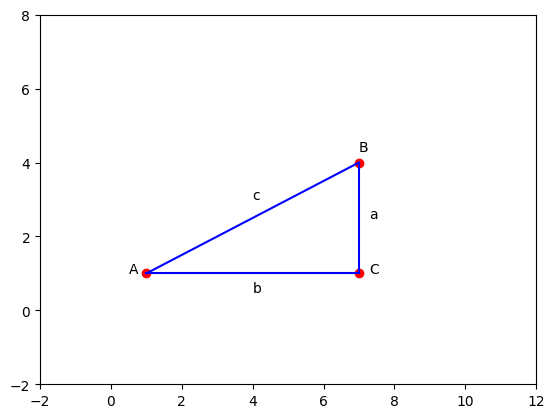

In [ ]:
import matplotlib.pyplot as plt
from IPython import display
import math
import time

fig, ax = plt.subplots()
plt.axis([-2,12,-2,8])
ax.text(0.5,1,'A')
plt.plot([1],[1],'ro')
ax.text(7.3,1,'C')
plt.plot([7],[1],'ro')
ax.text(7,4.3,'B')
plt.plot([7],[4],'ro')

plt.plot([1,7], [1,1], 'b')
plt.plot([7,7], [1,4], 'b')
plt.plot([1,7], [1,4], 'b')
display.display(plt.gcf())
# time.sleep(1)
display.clear_output(wait=True)

ax.text(4,0.5,'b')
display.display(plt.gcf())
# time.sleep(1.5)
display.clear_output(wait=True)

ax.text(7.3,2.5,'a')
display.display(plt.gcf())
# time.sleep(1.5)
display.clear_output(wait=True)

ax.text(4,3,'c')
display.display(plt.gcf())
time.sleep(1.5)
display.clear_output(wait=True)



#Sine to find side measures

In [ ]:
import math

# make the unknown value zero
angle = 57
opposite = 4
hypotenuse = 0

if opposite==0:
    unknown = "opposite side"
    answer = hypotenuse * math.sin(math.radians(angle))

if hypotenuse==0:
    unknown = "hypotenuse"
    answer = opposite/math.sin(math.radians(angle))

print("The ", unknown, " is ", answer)



#Cosine to find side measures

In [ ]:
import math

# make the unknown value zero
angle = 57
adjacent = 3
hypotenuse = 0

if adjacent==0:
    unknown = "adjacent side"
    answer = hypotenuse * math.cos(math.radians(angle))

if hypotenuse==0:
    unknown = "hypotenuse"
    answer = adjacent/math.cos(math.radians(angle))

print("The ", unknown, " is ", answer)


The  hypotenuse  is  5.508235376329989


#Tangent to find side measures

In [ ]:
import math

# make the unknown value zero
angle =
opposite =
adjacent =

if opposite==0:
    unknown = "opposite side"
    answer = adjacent * math.tan(math.radians(angle))

if hypotenuse==0:
    unknown = "adjacent side"
    answer = opposite/math.tan(math.radians(angle))

print("The ", unknown, " is ", answer)


#Inverse trig to find angle measures

In [ ]:
import math

# sides - make the unknown value zero
a =
b =
c =

if a==0:
    angle_A = math.degrees(math.acos(b/c))
    angle_B = 90-angle_A
    print("Angle A = ", angle_A)
    print("Angle B = ", angle_B)

if b==0:
    angle_A = math.degrees(math.asin(a/c))
    angle_B = 90-angle_A
    print("Angle A = ", angle_A)
    print("Angle B = ", angle_B)

if c==0:
    angle_A = math.degrees(math.atan(a/b))
    angle_B = 90-angle_A
    print("Angle A = ", angle_A)
    print("Angle B = ", angle_B)






#The Unit Circle

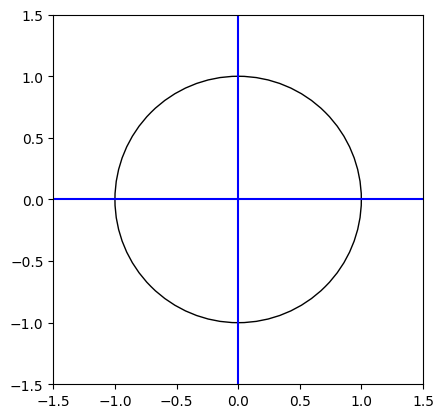

In [ ]:
import matplotlib.pyplot as plt
from IPython import display


fig, ax = plt.subplots()
plt.axis([-1.5,1.5,-1.5,1.5])
plt.plot([-2,2],[0,0],'b')
plt.plot([0,0],[-2,2],'b')
circle = plt.Circle((0,0), 1, fill = False )
ax.add_artist(circle)
ax.set_aspect('equal')

plt.show()


#Triangles in the unit circle

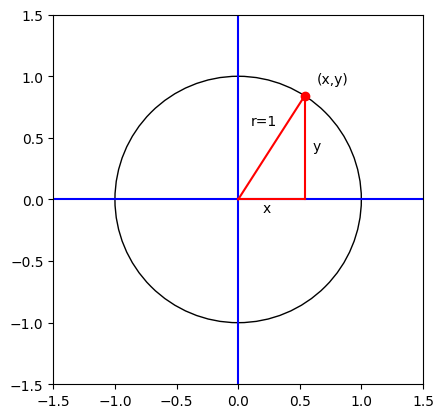

In [ ]:
import matplotlib.pyplot as plt
from IPython import display
import math

fig, ax = plt.subplots()
plt.axis([-1.5,1.5,-1.5,1.5])
plt.plot([-2,2],[0,0],'b')
plt.plot([0,0],[-2,2],'b')
circle = plt.Circle( (0,0), 1, fill = False )
ax.add_artist(circle)
ax.set_aspect('equal')

# the triangle
a = 1
x = math.cos(a)
y = math.sin(a)
plt.plot([x],[y],'r')
plt.plot([0,x],[0,y],'r')
plt.plot([0,x],[0,0],'r')
plt.plot([x,x],[0,y],'r')
plt.plot([x],[y],'ro')

ax.text(0.2,-0.1,'x')
ax.text(0.6,0.4,'y')
ax.text(0.1,0.6,'r=1')
ax.text(x+0.1,y+0.1, '(x,y)')

plt.show()


#Animated unit circle

In [ ]:
import matplotlib.pyplot as plt
from IPython import display
import math
import time


# the triangles
for a in range(70):
    time.sleep(0.3)
    display.clear_output(wait=True)
    fig, ax = plt.subplots()
    circle = plt.Circle((0,0), 1, fill = False )
    ax.set_aspect('equal')
    ax.add_artist(circle)
    plt.axis([-1.5,1.5,-1.5,1.5])
    plt.plot([-2,2],[0,0],'b')
    plt.plot([0,0],[-2,2],'b')

    angle = -0.1*a + math.pi/2
    x = math.cos(angle)
    y = math.sin(angle)

    #plt.plot([x],[y],'r')
    plt.plot([0,x],[0,y],'r')
    #plt.plot([0,x],[0,0],'r')
    #plt.plot([x,x],[0,y],'r')

    plt.show()

#Pythagorean trig

sin<sup>2</sup>(x) + cos<sup>2</sup>(x) = 1

In [ ]:
import math

for a in range(70):
    angle = 0.1*a
    y = math.sin(angle)**2
    x = math.cos(angle)**2
    r = x + y
    print(x, " + ", y, " = ", r )


#Radians and Degrees

$\frac{2π \;radians}{360 \;degrees}$ = $\frac{radians}{degrees}$

Convert radians to degrees

In [ ]:
# enter the radians, omitting pi
r = 5/4
d = r*180
print(r, "pi radians = ", d, "degrees")


1.25 pi radians =  225.0 degrees


Convert degrees to radians

In [ ]:
import math
from fractions import Fraction

d = 120
r = math.radians(d)
r2 = str(r/math.pi)
r3 = Fraction(r2).limit_denominator()
print(d, "degrees = ", r3, " pi radians")


120 degrees =  2/3  pi radians


#Graphing trig functions

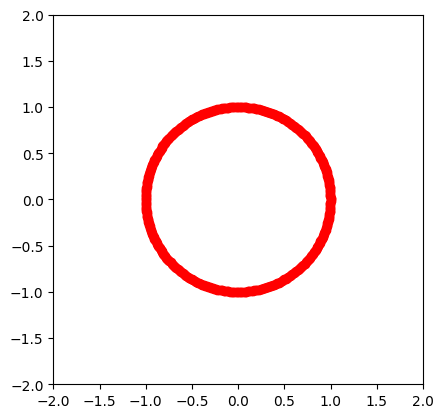

In [ ]:
import matplotlib.pyplot as plt
from IPython import display
import math
import time

fig, ax = plt.subplots()
plt.axis([-2,2,-2,2])
ax.set_aspect('equal')

for a in range(360):
    x = math.cos(math.radians(a))
    y = math.sin(math.radians(a))
    plt.plot([x],[y],'ro')

plt.show()


#Graph of sine in degrees

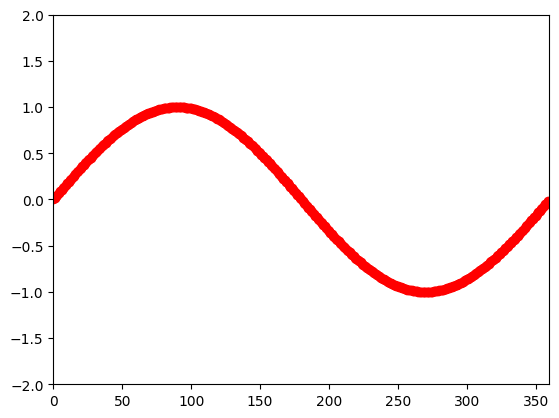

In [ ]:
import matplotlib.pyplot as plt
from IPython import display
import math


fig, ax = plt.subplots()
plt.axis([0,360,-2,2]) #
for a in range(360):
    x = a
    y = math.sin(math.radians(a))
    plt.plot([x],[y],'ro')

plt.show()


#Cirlce using radians

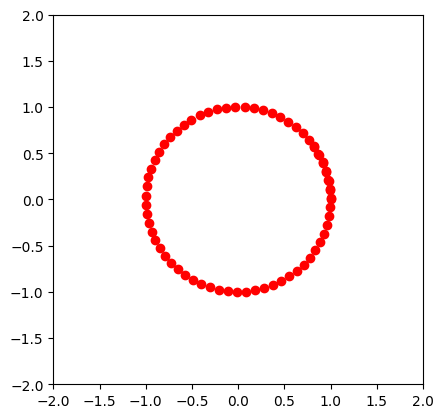

In [ ]:
import matplotlib.pyplot as plt
from IPython import display
import math

fig, ax = plt.subplots()
plt.axis([-2,2,-2,2])
ax.set_aspect('equal')

for a in range(70):
    angle = 0.1*a
    x = math.cos(angle)
    y = math.sin(angle)
    plt.plot([x],[y],'ro')

plt.show()


#Graph of sine in radians

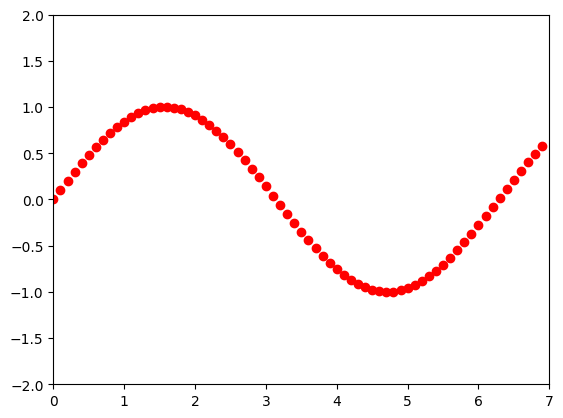

In [ ]:
import matplotlib.pyplot as plt
from IPython import display
import math

fig, ax = plt.subplots()
plt.axis([0,7,-2,2])
for a in range(70):
    angle = 0.1*a
    x = angle
    y = math.sin(angle)
    plt.plot([x],[y],'ro')

plt.show()


#Graph of sine using numpy

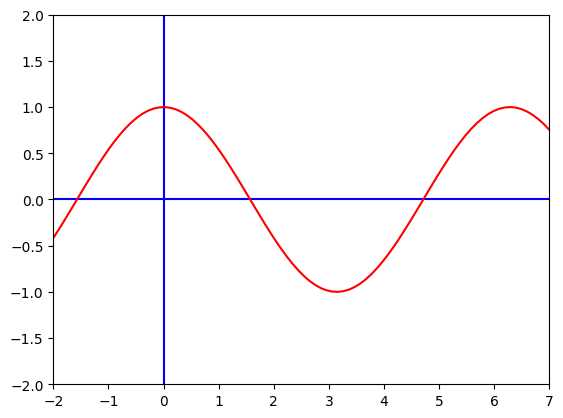

In [ ]:
import matplotlib.pyplot as plt
from IPython import display
import numpy as np
import math

# Graph dimensions
xmin = -2
xmax = 7
ymin = -2
ymax = 2
points = 10*(xmax-xmin)
x = np.linspace(xmin, xmax, points)

fig, ax = plt.subplots()
plt.axis([xmin,xmax, ymin,ymax])
plt.plot([xmin, xmax],[0,0],'b')
plt.plot([0,0],[ymin, ymax],'b')

#y = np.sin(x)
y = np.cos(x)
plt.plot(x,y,'r')

plt.show()

#Graph of tangent and more

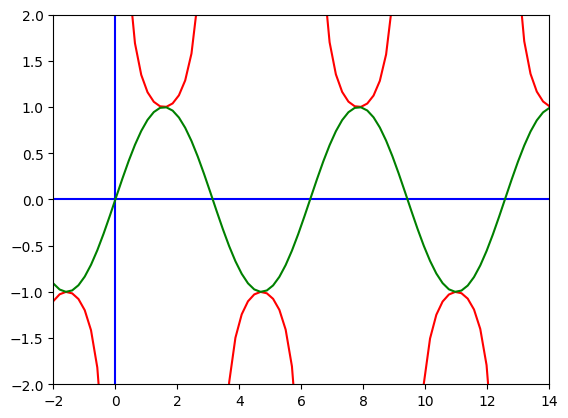

In [ ]:
import matplotlib.pyplot as plt
from IPython import display
import numpy as np
import math

# Graph dimensions
xmin = -2
xmax = 14
ymin = -2
ymax = 2
points = 5*(xmax-xmin)
x = np.linspace(xmin, xmax, points)

fig, ax = plt.subplots()
plt.axis([xmin,xmax, ymin,ymax])
plt.plot([xmin, xmax],[0,0],'b')
plt.plot([0,0],[ymin, ymax],'b')

# Tangent
#y = np.tan(x)
#y[:-1][np.diff(y) < 0] = np.nan

# Coangent
#y = 1/np.tan(x)
#y[:-1][np.diff(y) > 0] = np.nan

# Secant and Cosine
#y = 1/np.cos(x)
#y[:-1][np.diff(y) > 2] = np.nan
#y2 = np.cos(x)

# Cosecant and Sine
y = 1/np.sin(x)
y[:-1][np.diff(y) > 2] = np.nan
y2 = np.sin(x)


plt.plot(x,y,'r')
plt.plot(x,y2,'g')
plt.show()



#Sine wave transformations

In [ ]:
import matplotlib.pyplot as plt
from IPython import display
import numpy as np
import math
%matplotlib inline
from ipywidgets import interactive

# Graph dimensions
xmin = -2
xmax = 14
ymin = -5
ymax = 5
points = 10*(xmax-xmin)
x = np.linspace(xmin, xmax, points)

def graph(a,b,c):
    fig, ax = plt.subplots()
    eq = 'sin('
    eq2 = 'x) + '
    plt.title(f'{a}{eq}{b}{eq2}{c}')
    plt.axis([xmin,xmax, ymin,ymax])
    plt.plot([xmin, xmax],[0,0],'b')
    plt.plot([0,0],[ymin, ymax],'b')
    y = a*np.sin(b*x)+c
    plt.plot(x,y,'r')
    plt.show()

ig = interactive(graph, a=(-5,5), b=(-5,5), c=(-5,5))
ig


interactive(children=(IntSlider(value=0, description='a', max=5, min=-5), IntSlider(value=0, description='b', …

#Interacting sine waves
Notice the patterns when you add two sine functions ("additive interference")

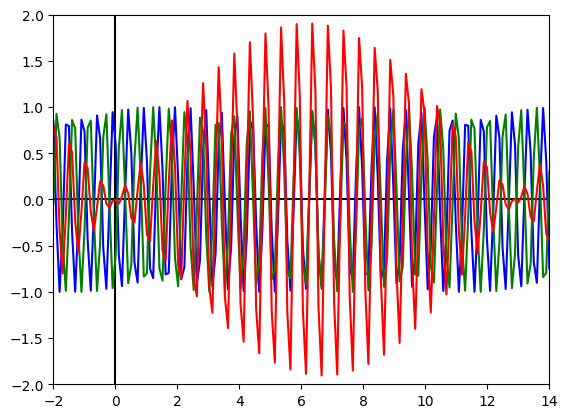

In [ ]:
import matplotlib.pyplot as plt
from IPython import display
import numpy as np
import math

# Graph dimensions
xmin = -2
xmax = 14
ymin = -2
ymax = 2
points = 10*(xmax-xmin)
x = np.linspace(xmin, xmax, points)

fig, ax = plt.subplots()
plt.axis([xmin,xmax, ymin,ymax])
plt.plot([xmin, xmax],[0,0],'k')
plt.plot([0,0],[ymin, ymax],'k')

# change these
y1 = np.sin(200*x)
y2 = np.sin(300*x)
y3 = y1 + y2

plt.plot(x,y1,'b')
plt.plot(x,y2,'g')
plt.plot(x,y3,'r')
plt.show()

#Tides and sine waves

Part 1 - get the data

In [ ]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from google.colab import files
import io

# dialog to upload from computer:
uploaded = files.upload()
file_name = next(iter(uploaded))
all_data = pd.read_csv(io.BytesIO(uploaded[file_name]))
tide_data = all_data

# API for tides:
# https://api.tidesandcurrents.noaa.gov/api/prod/

print(tide_data.describe())
tide_data.head()


Saving CO-OPS__9414290__wl.csv to CO-OPS__9414290__wl (3).csv
        Water Level       Sigma   O or I (for verified)      F      R      L
count    169.000000  169.000000              169.000000  169.0  169.0  169.0
mean       4.101136    0.107166                0.118343    0.0    0.0    0.0
std        1.535794    0.024129                0.323974    0.0    0.0    0.0
min        0.103000    0.059000                0.000000    0.0    0.0    0.0
25%        3.591000    0.092000                0.000000    0.0    0.0    0.0
50%        4.398000    0.105000                0.000000    0.0    0.0    0.0
75%        5.283000    0.121000                0.000000    0.0    0.0    0.0
max        5.910000    0.203000                1.000000    0.0    0.0    0.0


,Date Time,Water Level,Sigma,O or I (for verified),F,R,L,Quality
0,2023-06-09 00:00,5.323,0.161,0,0,0,0,p
1,2023-06-09 00:06,5.333,0.121,1,0,0,0,p
2,2023-06-09 00:12,5.339,0.203,0,0,0,0,p
3,2023-06-09 00:18,5.329,0.154,0,0,0,0,p
4,2023-06-09 00:24,5.346,0.105,0,0,0,0,p


Part 2 - continuing the above code (ChatGPT generated this part)

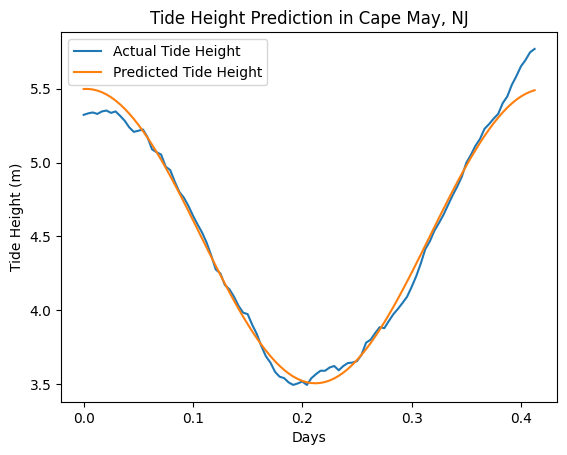

In [ ]:
tide_data = all_data.head(100)

# ChatGPT generated this code, but I had to modify it

# Extract necessary columns
time = pd.to_datetime(tide_data['Date Time'])
height = tide_data[' Water Level']

# Convert time to days since the first measurement
time = (time - time.min()).dt.total_seconds() / (24 * 3600)

# Define the sinusoidal function
def sinusoidal_func(x, a, b, c, d):
    return a * np.sin(b * (x - c)) + d

# Fit the data to the sinusoidal function
params, _ = curve_fit(sinusoidal_func, time, height)

# Generate predictions using the fitted parameters
predictions = sinusoidal_func(time, *params)

# Plot the original data and the predicted values
plt.plot(time, height, label='Actual Tide Height')
plt.plot(time, predictions, label='Predicted Tide Height')
plt.xlabel('Days')
plt.ylabel('Tide Height (m)')
plt.title('Tide Height Prediction in Cape May, NJ')
plt.legend()
plt.show()


Part 3 - More analysis to get a better graph

In [ ]:
import math
from ipywidgets import interactive

# my code again

time_mins = time*1440
mid_y = 0.8
max_y = []
min_y = []
minute_count = 0
max_count = 0

for mm in height:
    if mm>mid_y:
        max_y.append(mm)
        max_count = max_count+1

    if mm<mid_y:
        min_y.append(mm)

    minute_count = minute_count+1

# average amplitude values
max_av = np.mean(max_y)
min_av = np.mean(min_y)
amp = max_av - min_av

# average period values
period = float(minute_count)/float(max_count)
p2 = 0.009
p3 = 2*math.pi/period
print(period)
print(amp)
#y_predicted = amp*np.sin((p2*time_mins+900))+1

def p_tides(a,b):
    y_pred = a*np.sin(b*time_mins + 900) + 1

    # Plot the original data and the predicted values
    plt.plot(time_mins, height, label='Actual Tide Height')
    plt.plot(time_mins, y_pred, label='Predicted Tide Height')
    plt.xlabel('Minutes')
    plt.ylabel('Tide Height (m)')
    plt.title('Tide Height Prediction in Cape May, NJ')
    plt.legend()
    plt.show()

int_graph = interactive(p_tides, a =(0.5,0.9,0.1), b=(0.00,0.01,0.001))
int_graph


1.0
nan


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


interactive(children=(FloatSlider(value=0.6, description='a', max=0.9, min=0.5), FloatSlider(value=0.005, desc…

Part 4 - using sliders to estimate the graph

In [ ]:
#%matplotlib inline
#from ipywidgets import interactive
#def estimate(a,b,c):
import matplotlib.pyplot as plt

a = 0.5
b = 0.009
c = 0.8

#y_estimated = a*np.sin((b*time_mins+1500))+c
y_predicted = a*np.sin((b*time_mins+1000))+c
plt.plot(time_mins, height, label='Actual Tide Height')
plt.plot(time_mins, y_predicted, label='Predicted Tide Height')
plt.xlabel('Minutes')
plt.ylabel('Tide Height (m)')
plt.title('Tide Height Prediction in Cape May, NJ')
plt.legend()
plt.show()

ip = interactive(estimate, a=(1,10), b=(1,10),c=(1,10))
ip


#Law of Sines

Each side is proportional to the sine of the angle across from it:<br>
$\frac{a}{sin(A)}=\frac{b}{sin(B)}=\frac{c}{sin(C)}$


Unknown side - simple version

In [ ]:
import math

# known values
angle_A =
side_a =
angle_B =

# solve
side_b = math.sin(math.radians(angle_B))*side_a/math.sin(math.radians(angle_A))
print("side b = ", side_b)


Unknown angle - simple version

In [ ]:
import math

# known values
angle_A =
side_a =
side_b =

b = side_b*math.sin(math.radians(angle_A))/side_a
angle_B = math.degrees(math.asin(b))
print("angle = ", angle_B)


Either side or angle unknown, getting user input

In [ ]:
import math

# Prompt for known values
print("First, the known ratio")
angleA = float(input("Known angle: "))
sideA = float(input("Side across: "))
print("If you don't know the value, put 'x' (no quotes or spaces)")
angleB = input("Other angle: ")
sideB = input("Other side: ")

# unknown angle
if(angleB=="x"):
    side_B = float(sideB)
    ratioB = side_B*math.sin(math.radians(angleA))/sideA
    radians_B = math.asin(ratioB)
    angle_B = radians_B*180/math.pi
    print("angle = ", angle_B)

# unknown side
if(sideB=="x"):
    angle_B = float(angleB)
    side_B = math.sin(math.radians(angle_B))*sideA/math.sin(math.radians(angleA))
    print("side = ", side_B)



#Law of Cosines

Known sides are "a" and "b" and the known angle between them is "C," then the formula is<br>
c<sup>2</sup> = a<sup>2</sup> + b<sup>2</sup> - 2ab*cos(C)<br>


Unknown side - simple version

In [ ]:
import math

# known values
side_a =
side_b =
angle_C =

# solve
c = side_a**2 + side_b**2 - 2*side_a*side_b*math.cos(math.radians(angle_C))
side_c = math.sqrt(c)
print("side = ", side_c)


Unknown angle - simple version

In [ ]:
import math

# known values
side_a =
side_b =
side_c =

# solve
part_1 = side_c**2 - side_a**2 - side_b**2
part_2 = -(2*side_a*side_b)
part_3 = part_1/part_2
angle_C = math.degrees(math.acos(part_3))
print("angle = ", angle_C)



Either side or angle unknown - getting user input

In [ ]:
import math

# Get input
sideA = float(input("Side a: "))
sideB = float(input("Side b: "))
print("If you don't know the value, put 'x' (no quotes or spaces)")
sideC = input("Side c: ")
angleC = input("Angle C: ")

# Solve for angle C
if(angleC=="x"):
    side_C = float(sideC)
    step1 = side_C**2 - sideB**2 - sideA**2
    step2 = -2*sideA*sideB
    ratio_C = step1/step2
    radians_C = math.acos(ratio_C)
    angle_C = radians_C*180/math.pi
    print("Angle C = ", angle_C)

# Solve for side c
if(sideC=="x"):
    angle_C = float(angleC)
    step1 = sideA**2 + sideB**2 - 2*sideA*sideB*math.cos(math.radians(angleC))
    side_C = math.sqrt(step1)
    print("side  = ", side_C)




#A new area formula

To find the area of a triangle without knowing the base or the height:<br>
Area = $\frac{1}{2}*a*b*sin(C)$ <br>Where `a` and `b` are two sides and `C` is the angle between them.

In [ ]:
import math

side_A = float(input("Side a = "))
side_B = float(input("Side b = "))
angle_C = float(input("Angle C = "))

area = 0.5*side_A*side_B*math.sin(math.radians(angle_C))
print("Area = ", area)


# Solving any triangle

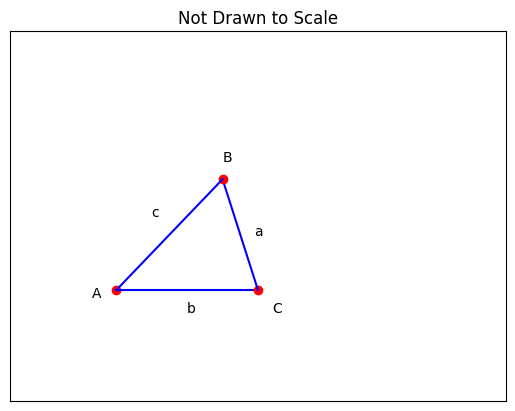

What do you know?
1 = two sides and the angle between
2 = three sides
3 = side, angle across, and another angle
4 = side, angle across, and another side
5 = a right angle and two sides
6 = a right angle, a side, and another angle
Enter one option number: 
1
Side A = 
3
Side B = 
4
Angle C = 
90
Angle A =  36.87
Side A =  3.0
Angle B =  53.13
Side B =  4.0
Angle C =  90.0
Side C =  5.0
Area =  6.0


In [ ]:
import matplotlib.pyplot as plt
import math

fig, ax = plt.subplots()
plt.axis([-2,12,-2,8])
ax.set_title('Not Drawn to Scale')

# Draw the sides of the triangle
plt.plot([1],[1],'ro')
plt.plot([1,5], [1,1], 'b')
plt.plot([5],[1],'ro')
plt.plot([5,4], [1,4], 'b')
plt.plot([4],[4],'ro')
plt.plot([1,4], [1,4], 'b')

# Label the sides and angles
ax.text(0.3,0.8,"A")
ax.text(4,4.5,"B")
ax.text(5.4,0.4,"C")
ax.text(4.9,2.5,"a")
ax.text(3,0.4,"b")
ax.text(2,3,"c")
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.show()

# Show options
print("What do you know?")
print("1 = two sides and the angle between")
print("2 = three sides")
print("3 = side, angle across, and another angle")
print("4 = side, angle across, and another side")
print("5 = a right angle and two sides")
print("6 = a right angle, a side, and another angle")
opt_number = input("Enter one option number: \n")


# Use these variables
angle_A = 0
side_A = 0
angle_B = 0
side_B = 0
angle_C = 0
side_C = 0
area = 0

# Law of Cosines to find unknown side
if(opt_number=="1"):
    side_A = float(input("Side A = \n"))
    side_B = float(input("Side B = \n"))
    angle_C = float(input("Angle C = \n"))
    step1 = side_A**2 + side_B**2 - 2*side_A*side_B*math.cos(math.radians(angle_C))
    side_C = math.sqrt(step1)
    # law of sines to find one other angle
    a = side_A*math.sin(math.radians(angle_C))/side_C
    angle_A = math.degrees(math.asin(a))
    # subtraction to find last angle
    angle_B = 180-angle_A-angle_C
    # area
    area = 0.5*side_A*side_B*math.sin(math.radians(angle_C))

# Law of Cosines to find unknown angle
if(opt_number=="2"):
    side_A = float(input("Side A = \n"))
    # complete this code


# Law of Sines to find unknown side
if(opt_number=="3"):
    side_A = float(input("Side A = \n"))
    # complete this code


# Law of Sines to find unknown angle
if(opt_number=="4"):
    side_A = float(input("Side A = \n"))
    # complete this code


# Pythagorean theorem
if(opt_number=="5"):
    print("Make Angle C the right angle")
    angle_C = 90
    side_A = float(input("Side A = \n"))
    # complete this code


# Trig ratios
if(opt_number=="6"):
    print("Make Angle C the right angle")
    angle_C = 90
    side_A = float(input("Side A = \n"))
    # complete this code


# Use these print statements and variables:
print("Angle A = ", round(angle_A,2))
print("Side A = ", round(side_A,2))
print("Angle B = ", round(angle_B,2))
print("Side B = ", round(side_B,2))
print("Angle C = ", round(angle_C,2))
print("Side C = ", round(side_C,2))
print("Area = ", round(area,2))


# Triangle from points
distance formula three times<br>
law of cosines twice<br>
subtraction



In [ ]:
def triangle(x1,y1,x2,y2,x3,y3):
    import math
    # get side a
    a = math.sqrt((x2-x1)**2 + (y2-y1)**2)
    # get side b
    b = math.sqrt((x3-x2)**2 + (y3-y2)**2)
    # get side c
    c = math.sqrt((x3-x1)**2 + (y3-y1)**2)
    # get angle a
    cos_a = (a**2 - b**2 - c**2)/(-2*b*c)
    a_radians = math.acos(cos_a)
    a_degrees = math.degrees(a_radians)
    # get angle b
    cos_b = (b**2 - a**2 - c**2)/(-2*a*c)
    b_radians = math.acos(cos_b)
    b_degrees = math.degrees(b_radians)
    # get angle c
    c_radians = math.pi - (a_radians + b_radians)
    c_degrees = 180 - (a_degrees + b_degrees)
    # get area
    area = 0.5*b*c*math.sin(a_radians)
    # output
    print("Angle A = ", round(a_degrees,1))
    print("Side A = ", round(a,1))
    print("Angle B = ", round(b_degrees,1))
    print("Side B = ", round(b,1))
    print("Angle C = ", round(c_degrees,1))
    print("Side c = ", round(c,1))
    print("Area = ", round(area,1))

# Call the function
triangle(0,3,0,0,4,0)


Angle A =  36.9
Side A =  3.0
Angle B =  53.1
Side B =  4.0
Angle C =  90.0
Side c =  5.0
Area =  6.0


# Matrix operations

A numbering plan for variables

Matrix A:
$\begin{bmatrix} a11 & a12\\ a21 & a22 \end{bmatrix}$
 Matrix B:
$\begin{bmatrix} b11 & b12 \\ b21 & b22 \end{bmatrix}$
<br>


In [ ]:
# enter all values
a11=1
a12=2
a21=3
a22=4

b11=5
b12=6
b21=7
b22=8

Add [A] + [B] = [C]

In [ ]:
# add corresponding numbers
c11 = a11 + b11
c12 = a12 + b12
c21 = a21 + b21
c22 = a22 + b22

print(c11,c12)
print(c21,c22)

Multiply [A] * [B] = [C]

In [ ]:
import numpy as np

# enter all values
a11=1
a12=2
a21=3
a22=4

b11=5
b12=6
b21=7
b22=8

# The actual steps
c11 = a11*b11 + a12*b21
c12 = a11*b12 + a12*b22
c21 = a21*b11 + a22*b21
c22 = a21*b12 + a22*b22

print("Multiplying Matrix A * Matrix B:")
print(c11,c12)
print(c21,c22)

# numpy
print("\n same matrix:")
A = np.array([[a11, a12], [a21, a22]])
B = np.array([[b11,b12], [b21,b22]])
C = A.dot(B)
print(C)

# np.matrix
print("\n np.matrix:")
E = np.matrix([[a11, a12], [a21, a22]])
F = np.matrix([[b11,b12], [b21,b22]])
G = E.dot(F)
print(G)



Other matrix operations

In [ ]:
# more about Matrix A
print("\n inverse of Matrix A:")
print(np.linalg.inv(A))
print("\n determinant of Matrix A:")
print(round(np.linalg.det(A)))
print("\n Matrix A multiplied by its inverse:")
D = np.around(A.dot(np.linalg.inv(A)))
print(D)

Another way to multiply

In [ ]:
import numpy as np

# Matrices as matrix objects
c = np.matrix([[1, 2], [3, 4]])
d = np.matrix([[5, 6, 7], [8, 9, 10]])
print("\nc", type(c))
print(c)
print("\nd", type(d))
print(d)
print("\ndot product of two matrix objects")
print(np.dot(c, d))


Converting matrix and array objects in numpy

In [ ]:
import numpy as np
from sympy import *

# Create an array
arr = np.array([[14, 0, 11, 3], [22, 25, 4, 7], [-12, -34, -3, -4]])

# Create a matrix from that array
M = Matrix(arr)
print("Matrix : {} ".format(M))

# could start by creating a matrix instead
# M = Matrix([[14, 0, 11, 3], [22, 23, 4, 7], [-12, -34, -3, -4]])

# convert that matrix back to an array
A = np.array(M)
print("\n same matrix:")
print(A)

# Solve using rref in the matrix
print("\n answers:")
M_rref = M.rref()
x = M_rref[0][3]
y = M_rref[0][7]
z = M_rref[0][11]
print("x = ", x)
print("y = ", y)
print("z = ", z)

print("\n row echelon form of matrix M: \n {}".format(M_rref))


# A quadratic equation from 3 points

points: (x1, y1), (x2, y2), (x3, y3)<p>
Standard equation: Ax<sup>2</sup> + Bx + C = y<br>
first point: A(x1)<sup>2</sup> + B(x1) + C = y1<br>
Second point: A(x2)<sup>2</sup> + B(x2) + C = y2<br>
Third point: A(x3)<sup>2</sup> + B(x3) + C = y3<p>
Matrix:<br>
$\begin{bmatrix} (x1)^2 & x1 & 1 & y1
\\ (x2)^2 & x2 & 1 & y2
\\ (x3)^2 & x3 & 1 & y3  \end{bmatrix}$

In [ ]:
import numpy as np
from sympy import *

# points
x1=-2
y1=0
x2=-3
y2=0
x3=-2.5
y3=-.25


M = Matrix([[x1**2,x1,1,y1],[x2**2,x2,1,y2],[x3**2,x3,1,y3]])
m_rref = M.rref()

# answers
a = round(m_rref[0][3])
b = round(m_rref[0][7])
c = round(m_rref[0][11])
print("a = ", a)
print("b = ", b)
print("c = ", c)

print("y = ", a,"x**2 + ", b, "x + ", c)
print("\n row echelon form of matrix M: \n {}".format(m_rref))



# Inverse matrix to solve a system of equations

In [ ]:
import numpy as np
from sympy import *

# use arrays instead of matrices
a1 = np.array([[14, 0, 11], [22, 23, 4], [-12, -34, -3]])
a2 = np.array([[3],[7],[-4]])

m_inv = np.linalg.inv(a1)
m_dot_a = np.around(np.dot(m_inv,a1))
m_dot = np.dot(m_inv,a2)
print(m_dot)

print("\n compare:")
print(445/1358)
print(10/679)
print(-14/97)

print(m_dot_a)


Another inverse matrix example

In [ ]:
import numpy as np
from sympy import *

# points
x1=-2
y1=0
x2=-3
y2=0
x3=-2.5
y3=-.25

# rref method
M = Matrix([[x1**2,x1,1,y1],[x2**2,x2,1,y2],[x3**2,x3,1,y3]])
m_rref = M.rref()

# answers
a = round(m_rref[0][3])
b = round(m_rref[0][7])
c = round(m_rref[0][11])
print("a = ", a)
print("b = ", b)
print("c = ", c)

# inverse matrix method
arr_3x3 = np.array([[x1**2,x1,1],[x2**2,x2,1],[x3**2,x3,1]])
arr_3x1 = np.array([[y1],[y2],[y3]])
arr_inv = np.linalg.inv(arr_3x3)
identity = np.around(np.dot(arr_inv,arr_3x3))
arr_values = np.dot(arr_inv,arr_3x1)
print(identity)
print("answers")
print(arr_values)
print("a = ", round(arr_values.item(0)))
print("b = ", round(arr_values.item(1)))
print("c = ", round(arr_values.item(2)))


# Encoding and decoding messages

Non-matrix method

In [ ]:
import numpy

# get input
in_text = input("Enter text to encode: ")
in_numbers = []
for a in in_text:
    in_numbers.append(ord(a))

# encode
encoded_numbers = []
for b in in_numbers:
    # this math can get more complex
    cipher = b + 37
    encoded_numbers.append(cipher)

# encoded message
print(encoded_numbers)

# get numbers to decode
in_code = input("Enter text to decode: ")
in_num = in_code.split(",")

# decode
decoded_letters = " "
for d in in_num:
    # inverse of the encoding math
    decipher = int(d) - 37
    decoded_letters += chr(decipher)

# decoded message
print("decoded \n", decoded_letters)


Matrix method - Every two characters in the message becomes a (1 x 2) matrix, multiplied by a (2 x 2) matrix to encode or decode

In [ ]:
import numpy as np

# arrays insted of matrices
encode = np.array([[2,4],[6,8]])
decode = np.linalg.inv(encode)

# get input
in_text = input("Enter text to encode: ")
in_numbers = []
for a in in_text:
    in_numbers.append(ord(a))

# make sure the array is even
if len(in_text)%2 != 0:
    in_numbers.append(46)

# encode
encoded_numbers = []
temp_1 = 0
temp_2 = 0
pn = -1
for b in in_numbers:
    if pn==-1:
        temp_1 = b
        pn = pn*(-1)
    else:
        temp_2 = b
        mat = np.array([temp_1,temp_2])
        en_dot = np.dot(mat,encode)
        encoded_numbers.append(en_dot.item(0))
        encoded_numbers.append(en_dot.item(1))
        pn = pn*(-1)

# encoded message
print(encoded_numbers)

# get numbers to decode
in_code = input("Enter text to decode: ")
in_num = in_code.split(",")

# decode
decoded_letters = " "
p_n = -1
for d in in_num:
    d_float = float(d)
    if p_n==-1:
        temp_1 = d_float
        p_n = p_n*(-1)
    else:
        temp_2 = d_float
        mat = np.array([temp_1,temp_2])
        de_dot = np.dot(mat,decode)
        decipher = int(de_dot.item(0))
        decoded_letters += chr(decipher)
        decipher2 = int(round(de_dot.item(1))) # rounding adjustment
        decoded_letters += chr(decipher2)
        p_n = p_n*(-1)

# decoded message
print("decoded \n", decoded_letters)


# Complex Numbers

i = $\sqrt{-1}$<p>
Calculating and displaying complex numbers

In [ ]:
import cmath
import math

z1 = complex(2, 3)
print(z1)
print("z1 real = ", z1.real)
print("z1 imaginary = ", z1.imag)

z2 = complex(1, 2)
z3 = complex(0,math.pi)
z4 = math.e**z3

print(z1-z2)
print(z1**2)
print(math.e**z3)
print(round(z4.real), " + ", round(z4.imag), "i")


Graphing on the real and imaginary axis

In [ ]:
import cmath
import math
import numpy as np
import matplotlib.pyplot as plt

x_min = -2
x_max = 2
y_min = -2
y_max = 2

plt.xlabel('Real')
plt.ylabel('Imaginary')
#plt.title(' ')

comp = complex(1, 0.75)
x1 = comp.real
y1 = comp.imag

a = np.linspace(0,7,140)
points = np.cos(a) + np.sin(a)*1j
x2 = points.real
y2 = points.imag

plt.plot(x2,y2,'b') # points or line
plt.show()


# Mandelbrot Set

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def mandelbrot(c, max_iter):
    z = 0
    for i in range(max_iter):
        z = z*z + c
        if abs(z) > 2:
            return i
    return max_iter

def plot_mandelbrot(x_min, x_max, y_min, y_max, width, height, max_iter):
    x = np.linspace(x_min, x_max, width)
    y = np.linspace(y_min, y_max, height)
    X, Y = np.meshgrid(x, y)
    Z = X + 1j * Y
    img = np.zeros((height, width))

    for i in range(height):
        for j in range(width):
            c = Z[i, j]
            img[i, j] = mandelbrot(c, max_iter)

    plt.imshow(img.T, cmap='hot', extent=[x_min, x_max, y_min, y_max])
    plt.xlabel('Re(c)')
    plt.ylabel('Im(c)')
    plt.title('Mandelbrot Set')
    plt.show()

# Define the parameters for the plot
x_min = -2.5 #0.32
x_max = 1 #0.36
y_min = -1.5 #-0.54
y_max = 1.5 #-0.50
width = 800
height = 600
max_iter = 100

# Call the plotting function
plot_mandelbrot(x_min, x_max, y_min, y_max, width, height, max_iter)


# Projectile motion

Range on flat ground<p>
range = $\frac{v^2*sin(2\theta)}g$

In [ ]:
import math

# initial velocity in meters per second
v = 50

# initial angle of projectile in radians
a = math.pi/4

# gravity in meters per second squared
g = 9.8

range = (v**2*math.sin(2*a))/g
print(round(range,3), "meters")


Range on a slope inclining at angle b from the horizontal<p>
range = $\frac{v^2*[sin(2\theta-b)-sin(b)]}{g*cos^2(b)}$

In [ ]:
import math

# initial velocity in meters per second
v = 50

# initial angle of projectile in radians
a = math.pi/4

# angle the slope makes with the horizontal in radians
b = math.pi/4.1

# gravity in meters per second squared
g = 9.8

range = (v**2*(math.sin(2*a-b)-math.sin(b)))/(g*math.cos(b)**2)
print(round(range,3), "meters")


Range on a slope declining at angle d from the horizontal<p>
range = $\frac{2*v^2*sin(\theta)*cos(\theta-d)}{g*cos^2(d)}$

In [ ]:
import math

# initial velocity in meters per second
v = 50

# initial angle projectile makes with plane in radians
a = math.pi/4

# angle the plane makes with the horizontal in radians
d = math.pi/6

# gravity in meters per second squared
g = 9.8

range = (2*v**2*math.sin(a)*math.cos(a-d))/(g*math.cos(d)**2)
print(round(range,3), "meters")


Maximum height of a projectile<p>
height = $\frac{v^2*sin^2(\theta)}{2g}$

In [ ]:
import math

# initial velocity in meters per second
v = 50

# initial angle of projectile in radians
a = math.pi/4

# gravity in meters per second squared
g = 9.8

height = (v**2*math.sin(a)**2)/(2*g)
print(round(height,3), "meters")


# Hours of daylight
<p>
source:
 https://web.archive.org/web/20180128172128/http://mathforum.org/library/drmath/view/56478.html



In [ ]:
import math

# latitude in degrees (up to 65)
L = 65

# day of the year
J = 173

# calculations in several steps
t1 = 0.9671396*math.tan(0.00860*(J-186))
p = math.asin(0.39795*math.cos(0.2163108 + 2*math.atan(t1)))
d1 = math.sin(0.8333*math.pi/180) + math.sin(L*math.pi/180) * math.sin(p)
d2 = math.cos(L*math.pi/180)*math.cos(p)
daylight = 24 - (24/math.pi)*math.acos(d1/d2)
print(round(daylight,1), " hours")


22.1  hours


# Logistic growth

y = $\frac{c}{1+ae^{-bx}}$<p>

Horizontal asymptotes at y = c and y = 0


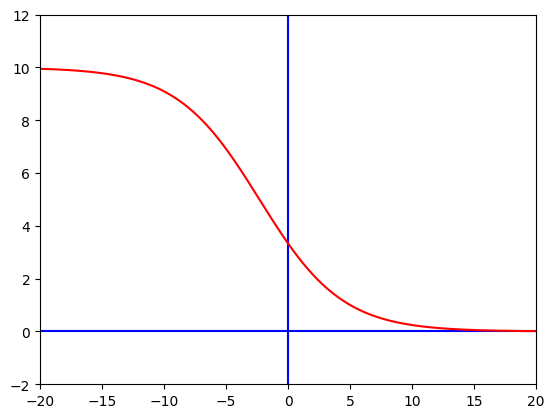

In [ ]:
from ast import Break
import matplotlib.pyplot as plt
from IPython import display
import numpy as np
import math

# carrying capacity (maximum y value)
c = 10

# a > 0
a = 2

# growth if b > 0, decay if b < 0
b = -0.3

# find good xmin and xmax values
for x_test in range(1000):
    y = c/(1+a*math.e**(-b*x_test))
    if b>0 and y>(c/2):
        xmax = int(round(5*x_test))
        xmin = -xmax
        break

    if b<0 and y<(c/2):
        xmax = int(round(5*x_test))
        xmin = -xmax
        break


if abs(xmax-xmin)<20:
    xmin = -20
    xmax = 20

# Graph dimensions
# xmin = calculated
# xmax = calculated
ymin = -2
ymax = c + 2
points = 10*(xmax-xmin)
x = np.linspace(xmin, xmax, points)

fig, ax = plt.subplots()
plt.axis([xmin,xmax, ymin,ymax])
plt.plot([xmin, xmax],[0,0],'b')
plt.plot([0,0],[ymin, ymax],'b')

y = c/(1+a*math.e**(-b*x))
plt.plot(x,y,'r')

plt.show()

# Limits

In [ ]:
import matplotlib.pyplot as plt
from IPython import display
import numpy as np
import math

# Graph dimensions
xmin = -7
xmax = 7
ymin = -2
ymax = 2
points = 10*(xmax-xmin)
x = np.linspace(xmin, xmax, points)

fig, ax = plt.subplots()
plt.axis([xmin,xmax, ymin,ymax])
plt.plot([xmin, xmax],[0,0],'b')
plt.plot([0,0],[ymin, ymax],'b')

y = np.sin(x)/x
plt.plot(x,y,'r')

plt.show()

# testing y values
x_value = 0
diff = 0.01
x_test_right = x_value + diff
x_test_left = x_value - diff

print(math.sin(x_test_right)/x_test_right)
print(math.sin(x_test_left)/x_test_left)



Trig factoring

In [ ]:
from sympy import *

x,y = symbols('x y')
init_printing(use_unicode=True)

# trigsimp(sin(x)**2 + cos(x)**2)
# trigsimp(1 + cot(x)**2)
# trigsimp(1/sec(x))
# trigsimp(1/cos(x)) no

# trigsimp(sin(x+y)) no
# trigsimp(sin(x)*cos(y)+cos(x)*sin(y))
trigsimp(sin(x)/cos(x))
# trigsimp(tan(x)) no

# no half angle formulas
# trigsimp((1-cos(x))/sin(x)) no
# trigsimp(tan(x/2)) no

# yes double angle formulas
# trigsimp(sin(2*x)) no
# trigsimp(2*sin(x)*cos(x))
# trigsimp((2*tan(x))/(1-tan(x)**2))

# trigsimp(0.5*(cos(x-y) - cos(x+y)))
# trigsimp(sin(x)+sin(y)) no
trigsimp(2*sin((x+y)/2)*cos((x-y)/2))


sin(x) + sin(y)

.

.

# Poisson Distribution

y = $\frac{\lambda^x}{x!}*e^{-\lambda}$<p>
where lambda ($\lambda$) is the expected value<p>
What is the probability that x happens?

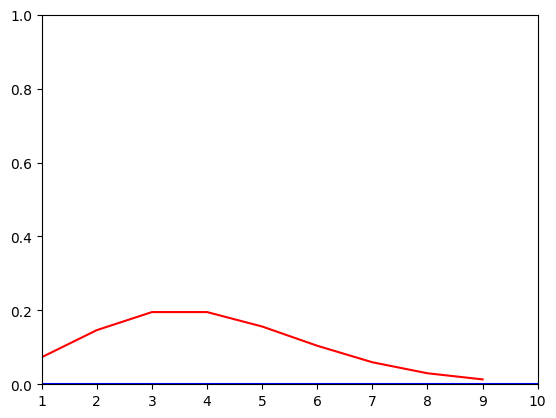

In [ ]:
import math
import matplotlib.pyplot as plt
from IPython import display
import numpy as np

# expected value
lam = 4

# Graph dimensions
xmin = 1
xmax = 10 # could change
ymin = 0
ymax = 1

# create arrays to plot
x = []
y = []

for x_next in range(1,10):
    x.append(x_next)
    y.append((lam**x_next)/math.factorial(x_next)*math.e**(-lam))

fig, ax = plt.subplots()
plt.axis([xmin,xmax, ymin,ymax])
plt.plot([xmin, xmax],[0,0],'b')
plt.plot([0,0],[ymin, ymax],'b')

plt.plot(x,y,'r')

plt.show()
